In [1]:
import os
import glob
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation

In [3]:
dataset_path = 'dataset'
diseases_folders = glob.glob(dataset_path + '/*')

print("Folders : {}".format(diseases_folders))

Folders : ['dataset\\Blight', 'dataset\\Common_Rust', 'dataset\\Gray_Leaf_Spot', 'dataset\\Healthy']


In [4]:
train_x = []    # Images Paths
train_y = []    # Disease Name

# Encoding: [Blight = 1, ]

for i in diseases_folders:
    disease_name = i[8:]
    images_paths = glob.glob(i + '/*')

    for j in images_paths:
        train_x.append(j)
        train_y.append(disease_name)

print(len(train_x))
print(len(train_y))

1200
1200


In [5]:
print(train_x[50])
print(train_y[50])

dataset\Blight\Corn_Blight (144).jpg
Blight


In [6]:
def read_image(path):
    img_arr = cv2.imread(path, cv2.IMREAD_COLOR)
    return (cv2.resize(img_arr, (224, 224), interpolation = cv2.INTER_LINEAR))

In [7]:
le = LabelEncoder()
le.fit(train_y)
print(list(le.classes_))
print(le.transform(list(le.classes_)))

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
[0 1 2 3]


In [8]:
train_X = []
train_Y = tf.keras.utils.to_categorical(le.transform(train_y))

for i in train_x:
    train_X.append(read_image(i))

In [9]:
train_X = np.array(train_X) / 255

In [10]:
X, X_val, Y, Y_val = train_test_split(train_X, train_Y, test_size = 0.33, random_state = 42)

In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = False,  # Set Input Mean to 0 over the Dataset
    samplewise_center = False,  # Set each Sample Mean to 0
    featurewise_std_normalization = False,  # Divide Inputs by Std of the Dataset
    samplewise_std_normalization = False,  # Divide each Input by its std
    zca_whitening = False,  # Apply ZCA Whitening
    rotation_range = 30,  # Randomly rotate Images in the range (degrees, 0 to 180)
    zoom_range = 0.2, # Randomly zoom Image 
    width_shift_range = 0.1,  # Randomly shift Images horizontally (fraction of total width)
    height_shift_range = 0.1,  # Randomly shift Images vertically (fraction of total height)
    horizontal_flip = True,  # Randomly horizontal flip images
    vertical_flip = False)  # Randomly vertical flip images

datagen.fit(train_X)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))


model.add(Dense(units = 4, activation = 'sigmoid'))
model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                     

In [13]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.3, min_lr=0.000001)
print(len(train_X))
print(len(train_Y))

1200
1200


In [14]:
history = model.fit(datagen.flow(X, Y, batch_size = 32), epochs = 100, validation_data = datagen.flow(X_val, Y_val), callbacks = [learning_rate_reduction])

Epoch 1/100


26/26 [==============================] - 36s 1s/step - loss: 1.2936 - accuracy: 0.4938 - val_loss: 1.5639 - val_accuracy: 0.2399 - lr: 0.0010
Epoch 2/100
26/26 [==============================] - 48s 2s/step - loss: 0.7426 - accuracy: 0.6505 - val_loss: 2.1352 - val_accuracy: 0.2399 - lr: 0.0010
Epoch 3/100
26/26 [==============================] - ETA: 0s - loss: 0.8130 - accuracy: 0.6219
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
26/26 [==============================] - 54s 2s/step - loss: 0.8130 - accuracy: 0.6219 - val_loss: 1.5812 - val_accuracy: 0.2399 - lr: 0.0010
Epoch 4/100
26/26 [==============================] - 63s 2s/step - loss: 0.5698 - accuracy: 0.7189 - val_loss: 1.8185 - val_accuracy: 0.2399 - lr: 3.0000e-04
Epoch 5/100
26/26 [==============================] - ETA: 0s - loss: 0.5296 - accuracy: 0.7512
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
26/26 [==============================] - 27s 1s/

In [17]:
print("Loss of the model is - ", model.evaluate(X_val, Y_val)[0])
print("Accuracy of the model is - ", model.evaluate(X_val, Y_val)[1] * 100, '%')
model.save('Custom_Model.keras')

13/13 [==============================] - 3s 210ms/step - loss: 0.4869 - accuracy: 0.8182
Loss of the model is -  0.48687493801116943
13/13 [==============================] - 3s 213ms/step - loss: 0.4869 - accuracy: 0.8182
Accuracy of the model is -  81.81818127632141 %


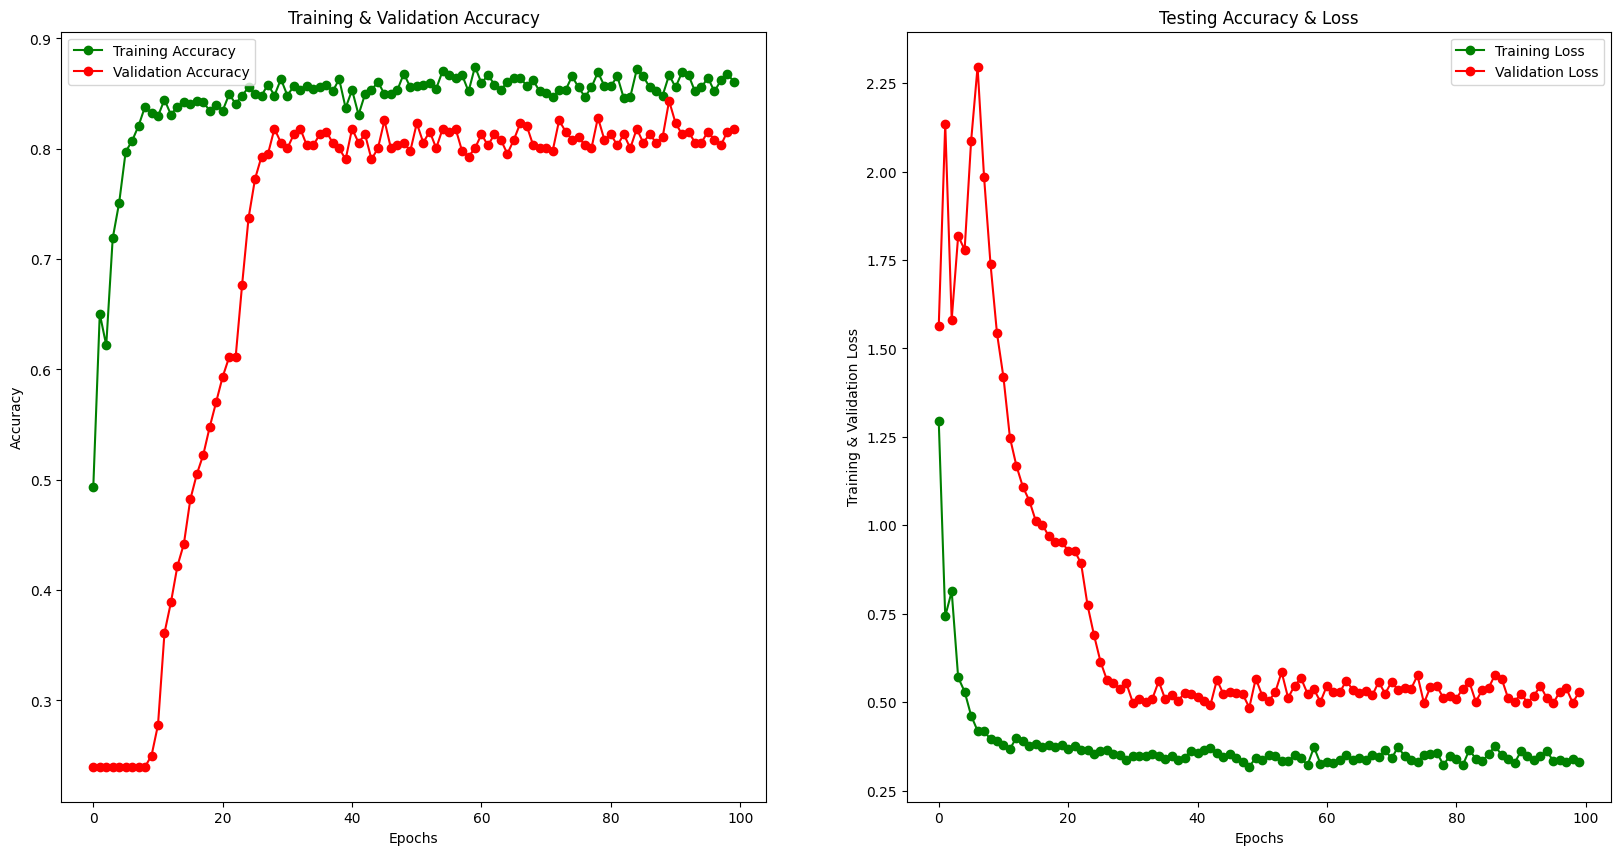

In [16]:
epochs = [i for i in range(100)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label = 'Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()